# Code for “Applied Machine Learning for biological problems” project 2 - predicting antibiotic resistance
Battisti Nicola, Efthymiadis Georgios, Predl Michael, Trinh Philipp (group 4)

# Loading packages:
---

## Install auto-sklearn:
---

In [ ]:
!git clone --recurse-submodules https://github.com/automl/auto-sklearn.git

import re
with open('./auto-sklearn/requirements.txt', 'r') as f:
    reqs = re.sub('scikit-learn>=0.24.0,<0.25.0','scikit-learn>=0.24.0',f.read())

with open('./auto-sklearn/requirements.txt', 'w') as f:
    f.write(reqs)

!pip install ./auto-sklearn

import autosklearn
print(F'{autosklearn.__version__=}')
from pprint import pprint

import autosklearn.classification
import sklearn.datasets
import sklearn.metrics

Cloning into 'auto-sklearn'...
remote: Enumerating objects: 64622, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 64622 (delta 20), reused 2 (delta 0), pack-reused 64584
Receiving objects: 100% (64622/64622), 123.46 MiB | 29.00 MiB/s, done.
Resolving deltas: 100% (52250/52250), done.
Submodule 'autosklearn/automl_common' (https://github.com/automl/automl_common) registered for path 'autosklearn/automl_common'
Cloning into '/content/auto-sklearn/autosklearn/automl_common'...
remote: Enumerating objects: 1488, done.        
remote: Counting objects: 100% (71/71), done.        
remote: Compressing objects: 100% (51/51), done.        
remote: Total 1488 (delta 45), reused 26 (delta 20), pack-reused 1417        
Receiving objects: 100% (1488/1488), 300.97 KiB | 1.55 MiB/s, done.
Resolving deltas: 100% (960/960), done.
Submodule path 'autosklearn/automl_common': checked out 'c760e29b5fbf90455d1a16aebbca6424468628c2'
Processi

## Import other packages:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Uploading antibio_dataset:
---

In [ ]:
import os
from google.colab import files
import tarfile
import pandas as pd

folder_path = '/content/antibio_dataset'

# Check if the folder exists
if not os.path.exists(folder_path):
    print(f"The folder {folder_path} doesn't exist. Upload the .tar.gz file below, please...")
    uploaded = files.upload()

    # Get the name of the uploaded .tar.gz file
    tar_filename = list(uploaded.keys())[0]

    # Extract the contents to the specified folder path
    with tarfile.open(tar_filename, 'r:gz') as tar_ref:
        tar_ref.extractall(folder_path)

    # Remove the uploaded .tar.gz file
    os.remove(tar_filename)

    print(f"The folder {folder_path} has been uploaded and extracted.")
else:
    # Optional: Code to run if the folder exists
    print(f"The folder {folder_path} already exists.")

The folder /content/antibio_dataset doesn't exist. Upload the .tar.gz file below, please...


Saving antibio_dataset.tar.gz to antibio_dataset.tar.gz
The folder /content/antibio_dataset has been uploaded and extracted.


In [ ]:
# Replace 'your_file.tsv' with the actual path to your TSV file
tsv_file_path = '/content/antibio_dataset/kmers_azithromycin.tsv'

# Read the TSV file
df_AM_original = pd.read_csv(tsv_file_path, sep='\t', error_bad_lines=False)

<ipython-input-4-70dc5429a8c9>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_AM_original = pd.read_csv(tsv_file_path, sep='\t', error_bad_lines=False)


In [ ]:
# Replace 'your_file.tsv' with the actual path to your TSV file
tsv_file_path = '/content/antibio_dataset/kmers_cefixime.tsv'

# Read the TSV file
df_CX_original = pd.read_csv(tsv_file_path, sep='\t')

In [ ]:
# Replace 'your_file.tsv' with the actual path to your TSV file
tsv_file_path = '/content/antibio_dataset/kmers_ciprofloxacin.tsv'

# Read the TSV file
df_CF_original = pd.read_csv(tsv_file_path, sep='\t')

In [ ]:

# Replace 'your_file.tsv' with the actual path to your TSV file
csv_file_path = '/content/antibio_dataset/resist.csv'

# Read the TSV file
df_res_original = pd.read_csv(csv_file_path)

In [ ]:
df_AM_original

,pattern_id,ERR1549286,ERR1549290,ERR1549291,ERR1549287,ERR1549288,ERR1549299,ERR1549292,ERR1549298,ERR1549296,...,ERR2172345,ERR2172346,ERR2172347,ERR2172348,ERR2172349,ERR2172350,ERR2172351,ERR2172352,ERR2172353,ERR2172354
0,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,TACCGTAACCGGCAATGCGGATATTACGGTC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CCAAAAATTACCCGCGTTGACGTAGCTAAAGA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
511,ACTCGAATTTTGCAGGATTGGTATCAATGGCGATAATGCGACCGGC...,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
512,"ACCCGGCCCGGGCTGGCAGGCTACGGCTACACCGGTATCC,CACCT...",1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
513,AGCCTGATTCACCAATGGTTTGTTCATAACAA,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
df_res_original

,Sample_ID,azm_sr,cip_sr,cfx_sr
0,ERR1549286,1.0,NaN,NaN
1,ERR1549290,1.0,NaN,NaN
2,ERR1549291,1.0,NaN,NaN
3,ERR1549287,1.0,NaN,NaN
4,ERR1549288,1.0,NaN,NaN
...,...,...,...,...
3781,ERR2172350,1.0,NaN,NaN
3782,ERR2172351,1.0,NaN,NaN
3783,ERR2172352,1.0,NaN,NaN
3784,ERR2172353,1.0,NaN,NaN


In [ ]:
print(df_res_original["azm_sr"].dropna().value_counts())
print(df_res_original["cip_sr"].dropna().value_counts())
print(df_res_original["cfx_sr"].dropna().value_counts())

0.0    3031
1.0     447
Name: azm_sr, dtype: int64
0.0    1660
1.0    1428
Name: cip_sr, dtype: int64
0.0    3396
1.0       5
Name: cfx_sr, dtype: int64


The ciprofloxacin dataset contains almost no positive datapoints.

# Setting random state:
---

In [ ]:
random_state = 12345

# Data exploration

## 1.) Comparison of features across the three antibiotics

---



In [ ]:
df_AM_feats = df_AM_original.copy()
df_CF_feats = df_CF_original.copy()
df_CX_feats = df_CX_original.copy()

In [ ]:
features_AM = set(df_AM_feats["pattern_id"])
features_CF = set(df_CF_feats["pattern_id"])
features_CX = set(df_CX_feats["pattern_id"])

In [ ]:
def print_set_overlap(set_dict):
  keys = list(set_dict.keys())
  for idxA, nameA in enumerate(keys):
    setA = set_dict[nameA]
    for idxB in range(idxA+1, len(keys)):
      nameB = keys[idxB]
      setB = set_dict[nameB]
      total_elements = len(setA.union(setB))
      intersect = len(setA.intersection(setB))
      print(f"Overlap of {nameA} and {nameB}: {100*intersect/total_elements}% ({intersect}/{total_elements})")

In [ ]:
print_set_overlap({"AM": features_AM, "CF": features_CF, "CX": features_CX})

Overlap of AM and CF: 0.06395224898742273% (6/9382)
Overlap of AM and CX: 0.0% (0/899)
Overlap of CF and CX: 0.0% (0/9257)


The features are almost all unique for the three different antibiotics. A multicategorical machine learning model thus does not make sense, as all three instances have separate feature space. Instead, learn separate models and run all of them to predict the resistance.

# Statistics of the data
---

## Transpose DataFrames


Transpose the dataframes so that rows are observations (organisms) and columns are features (genomic patterns)

> Indented block



In [ ]:
df_AM_feats = df_AM_original.copy().set_index("pattern_id").T
df_CF_feats = df_CF_original.copy().set_index("pattern_id").T
df_CX_feats = df_CX_original.copy().set_index("pattern_id").T

In [ ]:
df_AM_feats

pattern_id,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,TACCGTAACCGGCAATGCGGATATTACGGTC,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,CCAAAAATTACCCGCGTTGACGTAGCTAAAGA,CGGACCGGTATTCCGTCGAAATCACCGCCGTCAACCGCCCC,TGAAATTGTCCATCTCGTATGCCGTCTTCTGCTTG,"TACGGTATTGTCCGCATTATTAAACTCAAAACC,AGAAGACGGCATACGAGATGGACAATTTCATCC",GGCATTTTTTTTGCGTTTTTCGGGAGGGGGCGGC,TATATAAGGGGTTGCCGTTCCGCAGTTGGGCGGCAGCATAC,...,ACCGATGAGTTCGCCGGAATCGGTACGATTGAC,CTGCTGGACAAAAAAGGGATTAAAGATATCACC,CGTTCCTTTCGGCGTATTCTCGCCGTTGCGCGGCG,TCACATTTCCGCTTCAGACGGCATCCGATATGA,GAAGCTGCCACGCCGGCAGAAGTGTTGTTTGCGGG,ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG,ACTCGAATTTTGCAGGATTGGTATCAATGGCGATAATGCGACCGGCTTTGG,"ACCCGGCCCGGGCTGGCAGGCTACGGCTACACCGGTATCC,CACCTTAGGGAATCGTTCCCTTTGGGCCGGG,TACGCCGAAAGGAACGTGTATGCTGCCGCCC,GGGATTGTTGATTGTCGGACTGTTGTGCAACCTC",AGCCTGATTCACCAATGGTTTGTTCATAACAA,TTTTGAGCAGAAAGCAGTCAAAAACAGGGGGATTTTGCCCTTTTGACAGGTTCGAGTGCCG
ERR1549286,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ERR1549290,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ERR1549291,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ERR1549287,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ERR1549288,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERR2172350,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ERR2172351,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ERR2172352,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ERR2172353,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
df_AM_target = df_res_original.set_index("Sample_ID")["azm_sr"].dropna().rename("target")
df_CF_target = df_res_original.set_index("Sample_ID")["cip_sr"].dropna().rename("target")
df_CX_target = df_res_original.set_index("Sample_ID")["cfx_sr"].dropna().rename("target")

In [ ]:
df_AM_all = df_AM_feats.copy().join(df_AM_target)
df_CF_all = df_CF_feats.copy().join(df_CF_target)
df_CX_all = df_CX_feats.copy().join(df_CX_target)

In [ ]:
named_dfs = {"AM": df_AM_all, "CF": df_CF_all, "CX": df_CX_all}
named_feat_dfs = {"AM": df_AM_feats, "CF": df_CF_feats, "CX": df_CX_feats}

In [ ]:
for df_name, df in named_dfs.items():
  print(f"{df_name}: Observations: {df.shape[0]}, Features: {df.shape[1]}")

for df_name, df in named_feat_dfs.items():
  print(f"{df_name} (features): Observations: {df.shape[0]}, Features: {df.shape[1]}")

AM: Observations: 3971, Features: 516
CF: Observations: 3971, Features: 8874
CX: Observations: 3971, Features: 385
AM (features): Observations: 3971, Features: 515
CF (features): Observations: 3971, Features: 8873
CX (features): Observations: 3971, Features: 384


In [ ]:
df_AM_all

,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,TACCGTAACCGGCAATGCGGATATTACGGTC,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,CCAAAAATTACCCGCGTTGACGTAGCTAAAGA,CGGACCGGTATTCCGTCGAAATCACCGCCGTCAACCGCCCC,TGAAATTGTCCATCTCGTATGCCGTCTTCTGCTTG,"TACGGTATTGTCCGCATTATTAAACTCAAAACC,AGAAGACGGCATACGAGATGGACAATTTCATCC",GGCATTTTTTTTGCGTTTTTCGGGAGGGGGCGGC,TATATAAGGGGTTGCCGTTCCGCAGTTGGGCGGCAGCATAC,...,CTGCTGGACAAAAAAGGGATTAAAGATATCACC,CGTTCCTTTCGGCGTATTCTCGCCGTTGCGCGGCG,TCACATTTCCGCTTCAGACGGCATCCGATATGA,GAAGCTGCCACGCCGGCAGAAGTGTTGTTTGCGGG,ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG,ACTCGAATTTTGCAGGATTGGTATCAATGGCGATAATGCGACCGGCTTTGG,"ACCCGGCCCGGGCTGGCAGGCTACGGCTACACCGGTATCC,CACCTTAGGGAATCGTTCCCTTTGGGCCGGG,TACGCCGAAAGGAACGTGTATGCTGCCGCCC,GGGATTGTTGATTGTCGGACTGTTGTGCAACCTC",AGCCTGATTCACCAATGGTTTGTTCATAACAA,TTTTGAGCAGAAAGCAGTCAAAAACAGGGGGATTTTGCCCTTTTGACAGGTTCGAGTGCCG,target
ERR1549286,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
ERR1549290,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
ERR1549291,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
ERR1549287,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
ERR1549288,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERR2172350,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
ERR2172351,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
ERR2172352,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
ERR2172353,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0


## 1.) **Feature statistics:**

In [ ]:
features = list(df_AM_feats.columns)
features

['CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG',
 'TACCGTAACCGGCAATGCGGATATTACGGTC',
 'CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG',
 'AACGGGTTTTCAGACGGCATTCGATATCGGGACG',
 'CCAAAAATTACCCGCGTTGACGTAGCTAAAGA',
 'CGGACCGGTATTCCGTCGAAATCACCGCCGTCAACCGCCCC',
 'TGAAATTGTCCATCTCGTATGCCGTCTTCTGCTTG',
 'TACGGTATTGTCCGCATTATTAAACTCAAAACC,AGAAGACGGCATACGAGATGGACAATTTCATCC',
 'GGCATTTTTTTTGCGTTTTTCGGGAGGGGGCGGC',
 'TATATAAGGGGTTGCCGTTCCGCAGTTGGGCGGCAGCATAC',
 'TGGTAATGCCGGGTGAGAACGTAACCATTACTGTAGAACTGATTGCG',
 'ACGCTTTGAACATATTTGCCTTTGATTTCGG',
 'TTATGAACAAACCATTGGTGAATCAGGCTGCTATGGT',
 'ACGGCGACGGCAGCGGCGACGGCGACGGCAACGGCA',
 'CGCATGGGCAAGCAGGTCGAGATATTCGCCG',
 'CCTGGCAAACGCTTCCCCGTCGCCCTCGAACA',
 'GTCTGATTTCACAAGTCTTGTGAAGTCTTACCTGCCTTACCGTCCAACATCCGCCGCAGCC',
 'AGCTTGGATATGTCCAATCCTACAGTGTTACG',
 'CCACTATGCTGACACCCGAACAAGTCAAGGCC',
 'TGCCGTCTTCTGCTTGAAAAAAAAAAAGCAC',
 'ATAAAGATGAGATAACGGCTTTGATTAATAGTCTTAAATAAAGGGGC',
 'CAGTTTGAAGTAGCGCGCGGCGGCAACGGCGTAAATCAGTGCCTG',
 'GAAGATGCAATCTACCCGCTGCTAGACGGAAA

Some patterns contain multiple kmers

In [ ]:
df_AM_feats.describe().T.describe()

,count,mean,std,min,25%,50%,75%,max
count,515.0,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.0
mean,3971.0,0.392640,0.134042,0.001942,0.347573,0.382524,0.440777,1.0
std,0.0,0.445948,0.148580,0.044065,0.476662,0.486476,0.496963,0.0
min,3971.0,0.000252,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,3971.0,0.000755,0.027479,0.000000,0.000000,0.000000,0.000000,1.0
50%,3971.0,0.078066,0.059279,0.000000,0.000000,0.000000,0.000000,1.0
75%,3971.0,0.979350,0.201884,0.000000,1.000000,1.000000,1.000000,1.0
max,3971.0,1.000000,0.500025,1.000000,1.000000,1.000000,1.000000,1.0


In [ ]:
df_CF_feats.describe().T.describe()

,count,mean,std,min,25%,50%,75%,max
count,8873.0,8873.000000,8873.000000,8873.000000,8873.000000,8873.000000,8873.000000,8873.0
mean,3971.0,0.500978,0.147663,0.000113,0.452947,0.503437,0.551561,1.0
std,0.0,0.453721,0.149562,0.010616,0.497753,0.500016,0.497362,0.0
min,3971.0,0.000252,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,3971.0,0.003777,0.038847,0.000000,0.000000,0.000000,0.000000,1.0
50%,3971.0,0.516243,0.074235,0.000000,0.000000,1.000000,1.000000,1.0
75%,3971.0,0.993201,0.216641,0.000000,1.000000,1.000000,1.000000,1.0
max,3971.0,1.000000,0.500063,1.000000,1.000000,1.000000,1.000000,1.0


In [ ]:
df_CX_feats.describe().T.describe()

,count,mean,std,min,25%,50%,75%,max
count,384.0,384.000000,384.000000,384.0,384.000000,384.000000,384.000000,384.0
mean,3971.0,0.450841,0.139790,0.0,0.406250,0.455729,0.492188,1.0
std,0.0,0.453706,0.150994,0.0,0.491773,0.498686,0.500591,0.0
min,3971.0,0.000252,0.015869,0.0,0.000000,0.000000,0.000000,1.0
25%,3971.0,0.000755,0.027479,0.0,0.000000,0.000000,0.000000,1.0
50%,3971.0,0.217074,0.059279,0.0,0.000000,0.000000,0.000000,1.0
75%,3971.0,0.984513,0.211299,0.0,1.000000,1.000000,1.000000,1.0
max,3971.0,0.999245,0.500059,0.0,1.000000,1.000000,1.000000,1.0


Some patterns appear in all organisms and all patterns appear in at least one organism. The mean abundance of features ranges from 39% to 50%.

## 2.) **Counts of NaN values:**

In [ ]:
for df_name, df in named_dfs.items():
  nans = df.isna().sum().sum()
  print(f"NaN values in {df_name}: {nans}")

NaN values in AM: 493
NaN values in CF: 883
NaN values in CX: 570


In [ ]:
for df_name, df in named_feat_dfs.items():
  nans = df.isna().sum().sum()
  print(f"NaN values in {df_name}: {nans}")

NaN values in AM: 0
NaN values in CF: 0
NaN values in CX: 0


NaNs are contained in the target value. These rows should be removed

In [ ]:
df_AM_all = df_AM_feats.copy().join(df_AM_target).dropna()
df_CF_all = df_CF_feats.copy().join(df_CF_target).dropna()
df_CX_all = df_CX_feats.copy().join(df_CX_target).dropna()

named_dfs = {"AM": df_AM_all, "CF": df_CF_all, "CX": df_CX_all}
named_feat_dfs = {"AM": df_AM_feats, "CF": df_CF_feats, "CX": df_CX_feats}

In [ ]:
for df_name, df in named_dfs.items():
  nans = df.isna().sum().sum()
  print(f"NaN values in {df_name}: {nans}")

NaN values in AM: 0
NaN values in CF: 0
NaN values in CX: 0


## 3.) **Duplicate detection**

### 3.1) Duplicate observations

In [ ]:
for df_name, df in named_dfs.items():
  dups = df.duplicated().sum()
  print(f"Duplicate rows in {df_name}: {dups} (~{round(100*dups/df.shape[0],2)}%)")

Duplicate rows in AM: 447 (~12.85%)
Duplicate rows in CF: 10 (~0.32%)
Duplicate rows in CX: 1312 (~38.58%)


In [ ]:
for df_name, df in named_dfs.items():
  dups = df.drop("target", axis=1).duplicated().sum()
  print(f"Duplicate rows in {df_name}: {dups} (~{round(100*dups/df.shape[0],2)}%)")

Duplicate rows in AM: 452 (~13.0%)
Duplicate rows in CF: 10 (~0.32%)
Duplicate rows in CX: 1313 (~38.61%)


There are 0.3% to 38.6% duplicate rows. These should be removed. Only a very minor fraction of observations exists, that has identical features, but differs in the target value.

In [ ]:
df_AM_all = df_AM_feats.copy().join(df_AM_target).dropna().drop_duplicates()
df_CF_all = df_CF_feats.copy().join(df_CF_target).dropna().drop_duplicates()
df_CX_all = df_CX_feats.copy().join(df_CX_target).dropna().drop_duplicates()

named_dfs = {"AM": df_AM_all, "CF": df_CF_all, "CX": df_CX_all}
named_feat_dfs = {"AM": df_AM_feats, "CF": df_CF_feats, "CX": df_CX_feats}

In [ ]:
for df_name, df in named_dfs.items():
  dups = df.duplicated().sum()
  print(f"Duplicate rows in {df_name}: {dups} (~{round(100*dups/df.shape[0],2)}%)")

Duplicate rows in AM: 0 (~0.0%)
Duplicate rows in CF: 0 (~0.0%)
Duplicate rows in CX: 0 (~0.0%)


### 3.2) Duplicate features

In [ ]:
for df_name, df in named_dfs.items():
  dups = df.drop("target", axis=1).T.duplicated().sum()
  print(f"Duplicate features in {df_name}: {dups} (~{round(100*dups/df.shape[0],2)}%)")

Duplicate features in AM: 24 (~0.79%)
Duplicate features in CF: 864 (~28.07%)
Duplicate features in CX: 25 (~1.2%)


There are 24 (0.79%) and 25 (1.2%) duplicate features in azithromycin and ciprofloxacin datasets. The cefixime dataset contains vastly more with 864 (28.07%) duplicate features.

In both cases, the duplicate features should be merged, to retain the kmer information.

In [ ]:
def find_duplicate_col_groups(df):
  value_str = df.apply(lambda x: "".join([str(i) for i in x.tolist()]))
  value_str = value_str.reset_index()
  duplicate_groups = value_str.groupby(0)["index"].apply(list)
  duplicate_groups = duplicate_groups[duplicate_groups.apply(len) > 1]
  return duplicate_groups

In [ ]:
named_dfs_no_dup_features = {}

for df_name, df in named_dfs.items():
  df_new = df.copy()
  dup_cols = find_duplicate_col_groups(df_new.drop("target", axis=1))
  for _, dup_group in dup_cols.items():
    if "target" in dup_group:
      print(f"A feature group is identical to the target value in {df_name}:\n{dup_group}")
      dup_group.remove("target")
    first_c = dup_group[0]
    to_drop = dup_group[1:]
    new_c_name = ",".join(dup_group)
    df_new = df_new.drop(to_drop, axis=1)
    df_new = df_new.rename({first_c: new_c_name})
    print(f"Dropping {len(to_drop)} features in {df_name}")

  named_dfs_no_dup_features[df_name] = df_new

Dropping 23 features in AM
Dropping 1 features in AM
Dropping 385 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 2 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 2 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 2 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 2 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 2 features in CF
Dropping 2 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 

Check if feature deduplication worked

In [ ]:
for df_name, df in named_dfs_no_dup_features.items():
  dups = df.drop("target", axis=1).T.duplicated().sum()
  print(f"Duplicate features in {df_name}: {dups} (~{round(100*dups/df.shape[0],2)}%)")

Duplicate features in AM: 0 (~0.0%)
Duplicate features in CF: 0 (~0.0%)
Duplicate features in CX: 0 (~0.0%)


Apply the changes

In [ ]:
named_dfs = named_dfs_no_dup_features

## 4.) **Outlier counts:**

### Outlier removal

In [ ]:
import numpy as np
# Outliers

def find_outliers(feature_values):
    Q1 = np.percentile(feature_values, 25)
    Q3 = np.percentile(feature_values, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (feature_values < lower_bound) | (feature_values > upper_bound)
    return outliers

for df_name, df in named_dfs.items():
  features_per_genome = df.drop("target", axis=1).sum(axis=1)
  feature_occurances = df.drop("target", axis=1).sum(axis=0)
  for feature, series in {"features_per_genome":features_per_genome, "feature_occurances":feature_occurances}.items():
      outliers = find_outliers(series)
      outlier_indices = series[outliers].index
      num_outliers = outliers.sum()
      print(f"Number of outliers in {feature} of {df_name}: {num_outliers}")
      if feature == "features_per_genome":
        # Outlier removal is only applied to the feature count per genome, as its distribution is similarly shaped to a normal distribution (single peak at mean). The feature occurance is a bimodal distribution and outlier removal based on IQR is not applied.
        df = df.drop(list(outlier_indices), axis=0)
        named_dfs[df_name] = df

Number of outliers in features_per_genome of AM: 69
Number of outliers in feature_occurances of AM: 0
Number of outliers in features_per_genome of CF: 67
Number of outliers in feature_occurances of CF: 0
Number of outliers in features_per_genome of CX: 48
Number of outliers in feature_occurances of CX: 0


### Identify and drop low information observations and features
Observations or features with only 0s, only 1s, or only 1 value not 0 or 1 are considered as low information.

In [ ]:
for df_name, df in named_dfs.items():

  num_observations, num_features = df.drop("target", axis=1).shape
  print(f"Dataset {df_name}: observations: {num_observations}, features: {num_features}")
  features_per_genome = df.drop("target", axis=1).sum(axis=1)
  feature_occurances = df.drop("target", axis=1).sum(axis=0)
  feature_occ_counts = feature_occurances.value_counts()
  low_info_feature_occ = feature_occ_counts[(feature_occ_counts.index < 2) | (feature_occ_counts.index > num_observations-2)]
  low_info_features = feature_occurances[(feature_occurances < 2) | (feature_occurances > num_observations-2)].index
  feature_genome_counts = features_per_genome.value_counts()
  low_info_feat_per_genome = feature_genome_counts[(feature_genome_counts.index < 2) | (feature_genome_counts.index > num_features-2)]
  low_info_genomes = features_per_genome[(features_per_genome < 2) | (features_per_genome > num_features-2)].index
  print(f"Number of low information features of {df_name}:\n{low_info_feature_occ}")
  print(f"Number of low information genomes of {df_name}:\n{low_info_feat_per_genome}")
  df = df.drop(list(low_info_features), axis=1)
  df = df.drop(list(low_info_genomes), axis=0)
  named_dfs[df_name] = df

Dataset AM: observations: 2962, features: 491
Number of low information features of AM:
1       73
2961    14
0       12
2962     4
dtype: int64
Number of low information genomes of AM:
Series([], dtype: int64)
Dataset CF: observations: 3011, features: 8009
Number of low information features of CF:
1       736
3010    340
3011     46
0        46
dtype: int64
Number of low information genomes of CF:
Series([], dtype: int64)
Dataset CX: observations: 2041, features: 359
Number of low information features of CX:
1       61
2040    14
2041     6
0        4
dtype: int64
Number of low information genomes of CX:
Series([], dtype: int64)


There are no low information genomes, but 10-20% low information features.

## 5.) **Plots (Correlation, Boxplots, distributions):**

### Boxplots

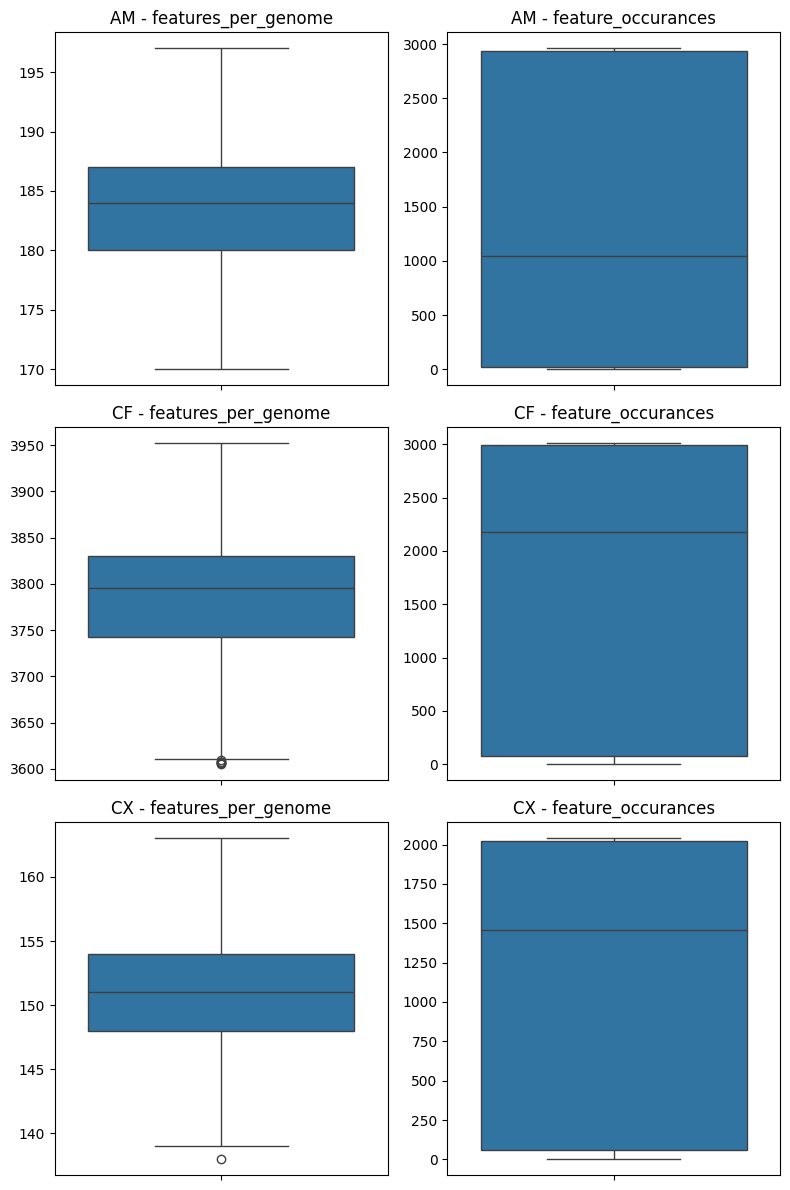

In [ ]:
# Boxplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,12))

r_idx = 0

for df_name, df in named_dfs.items():
  c_idx = 0
  features_per_genome = df.drop("target", axis=1).sum(axis=1)
  feature_occurances = df.drop("target", axis=1).sum(axis=0)
  for feature, series in {"features_per_genome":features_per_genome, "feature_occurances":feature_occurances}.items():
      sns.boxplot(series, ax=axes[r_idx, c_idx])
      axes[r_idx, c_idx].set_title(f'{df_name} - {feature}')
      c_idx += 1
  r_idx += 1

plt.tight_layout()

plt.show()

### Feature Distributions

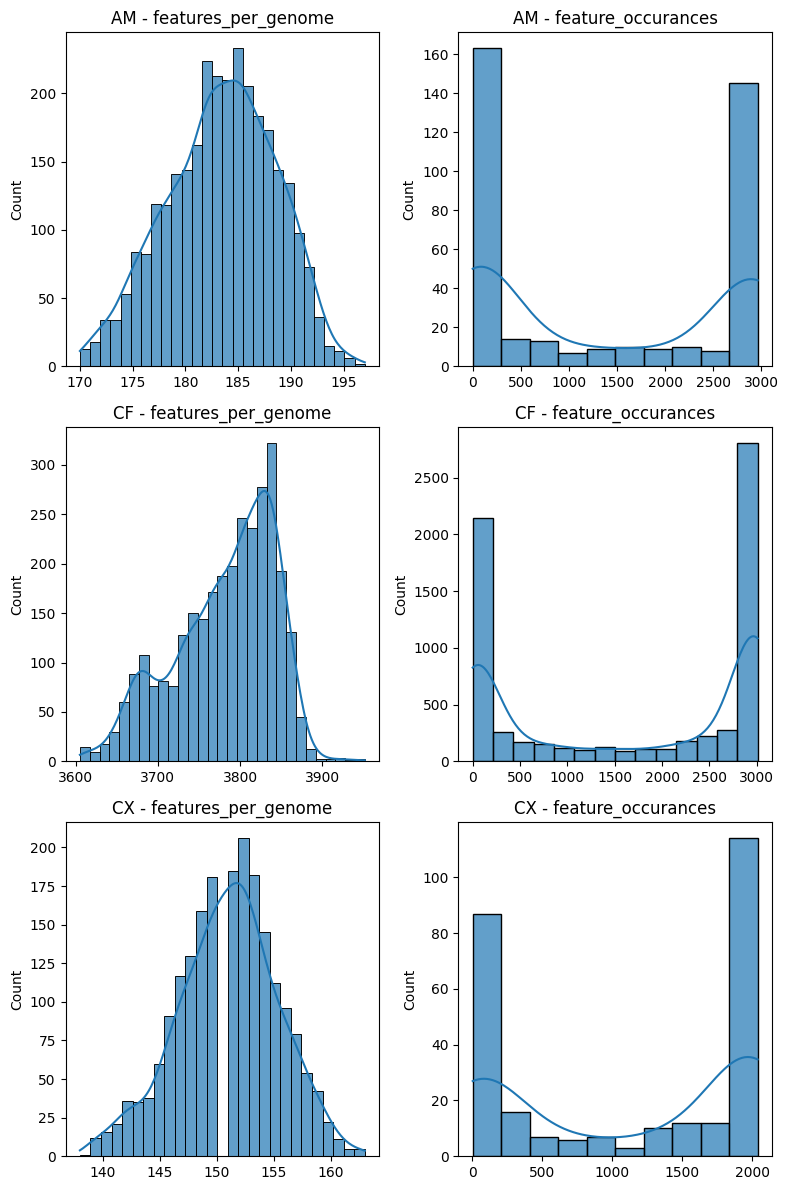

In [ ]:
# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,12))

r_idx = 0

for df_name, df in named_dfs.items():
  c_idx = 0
  features_per_genome = df.drop("target", axis=1).sum(axis=1)
  feature_occurances = df.drop("target", axis=1).sum(axis=0)
  for feature, series in {"features_per_genome":features_per_genome, "feature_occurances":feature_occurances}.items():
      sns.histplot(series, kde=True, ax=axes[r_idx, c_idx], alpha=0.7)
      axes[r_idx, c_idx].set_title(f'{df_name} - {feature}')
      c_idx += 1
  r_idx += 1

plt.tight_layout()
plt.show()


Check how the potability target feature is distributed

In [ ]:
from scipy import stats

for df_name, df in named_dfs.items():
  features_per_genome = df.drop("target", axis=1).sum(axis=1)
  feature_occurances = df.drop("target", axis=1).sum(axis=0)
  for feature, series in {"features_per_genome":features_per_genome, "feature_occurances":feature_occurances}.items():
      shapiro_result = stats.shapiro(series)
      print(f"Shapiro-Wilk test result for {feature} of {df_name}: P-value = {shapiro_result.pvalue}\n\tThe feature is {'not ' if shapiro_result.pvalue < 0.05 else ''} normal distributed.")

Shapiro-Wilk test result for features_per_genome of AM: P-value = 1.2175407437895608e-14
	The feature is not  normal distributed.
Shapiro-Wilk test result for feature_occurances of AM: P-value = 1.4740173669807642e-23
	The feature is not  normal distributed.
Shapiro-Wilk test result for features_per_genome of CF: P-value = 1.576402999819949e-29
	The feature is not  normal distributed.
Shapiro-Wilk test result for feature_occurances of CF: P-value = 0.0
	The feature is not  normal distributed.
Shapiro-Wilk test result for features_per_genome of CX: P-value = 1.9113151061844746e-09
	The feature is not  normal distributed.
Shapiro-Wilk test result for feature_occurances of CX: P-value = 2.219103537184091e-19
	The feature is not  normal distributed.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Interestingly, all of the features are definitely not normal distributed!

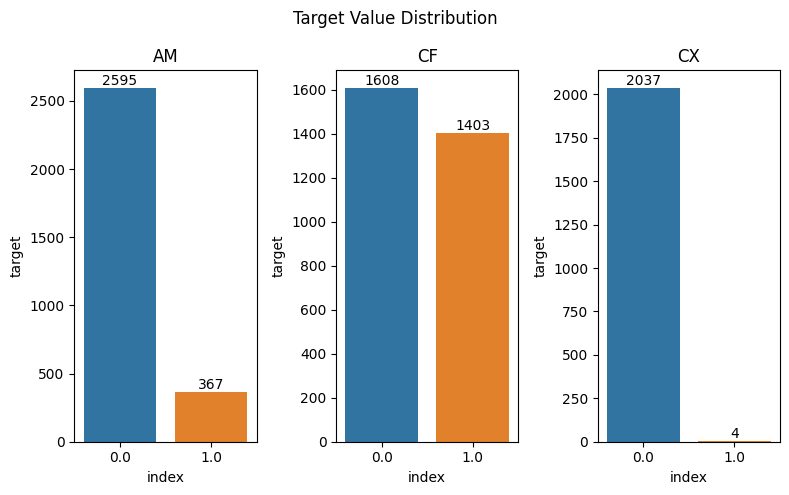

In [ ]:
# Boxplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8,5))

c_idx = 0

for df_name, df in named_dfs.items():
  target_dist = df["target"].value_counts().reset_index()
  fig = sns.barplot(data=target_dist, x="index", y="target", ax=axes[c_idx], hue="index", legend=False)
  axes[c_idx].set_title(f'{df_name}')
  c_idx += 1
  for container in fig.containers:
    fig.bar_label(container)

plt.suptitle("Target Value Distribution")

plt.tight_layout()

plt.show()

### Feature correlation

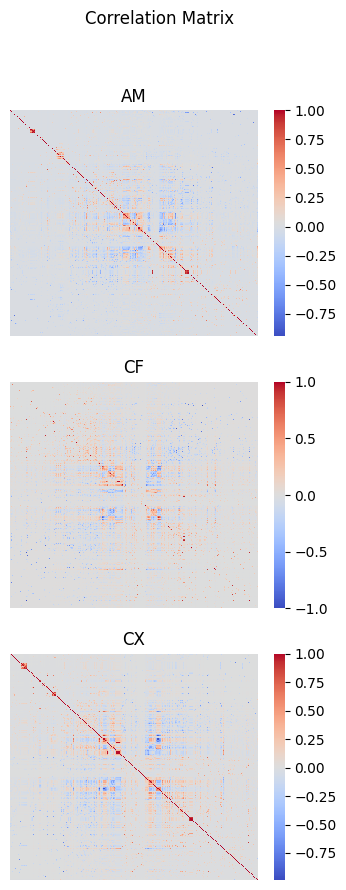

In [ ]:
# Correlation matrix:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(4,10))

i = 0
for df_name, df in named_dfs.items():
  correlation_matrix = df.corr()
  sns.heatmap(correlation_matrix, cmap='coolwarm', ax=axes[i], xticklabels=False, yticklabels=False)
  axes[i].set_title(df_name)
  i += 1
plt.suptitle(f'Correlation Matrix')
plt.show()

In [ ]:
for df_name, df in named_dfs.items():
  correlation_matrix = df.corr()
  correlation_dict = {}

  # Iterate through all possible pairs
  for i in range(correlation_matrix.shape[0]):
      for j in range(i + 1, correlation_matrix.shape[1]):
          pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
          value = correlation_matrix.iloc[i, j]
          if value >= 0. and value <= 1.:
            correlation_dict[pair] = np.abs(value)

  # Sort the dictionary by correlation values
  sorted_correlation_dict = dict(sorted(correlation_dict.items(), key=lambda x: x[1], reverse=True))

  # Get the top 3 and bottom 3 correlations
  top_correlations = list(sorted_correlation_dict.items())[:5]
  bottom_correlations = list(sorted_correlation_dict.items())[-5:][::-1]
  # Print the results
  print(f"\n\nTop 5 correlations ({df_name}):")
  for pair, value in top_correlations:
      print(f"{pair}: {value}")

  print(f"\nBottom 5 correlations ({df_name}):")
  for pair, value in bottom_correlations:
      print(f"{pair}: {value}")



Top 5 correlations (AM):
('TCCGTCGAAATTACCGCCGTCAACCGCCCCTTCCTGCTCGCC,ACACTATACCGGCCGGATGAAATTGTCCATC', 'ATTAATAGTCTTAAATAAAGGGGCTGTACCGGAT'): 1.0
('TAATTAAAAACAACATGGTAATCAATAATGACGATGAACCCACCACCCAATACTACAGCC', 'CAACTGCGGAACGGCAACCCCTTATATATTGCGTAA'): 1.0
('CATGGCATTCTCCGAAATCCAAAAACGGAAA,GCATCGTACCATCCCGACAGGAAACATCATACACATACTGACCGCCGGCGTGGACGAGGCA,AGGTTCTAGATTCCCGTTTTCACGGCAATGACG', 'ATATAATATCCCCAGTTTGTTTGTTGAAAAA,GCACTAAAATGGAAAGATATGCATATAATATCCCC,ATTGCCGGTTACGGTATTGTCCGCATTATTAAA,ATTTGACCCGCCAACCCGACCGCCGTGATTCCCG,GCAATTTTTCGTCATTGCCGTGAAAACGGGAATCTA'): 1.0
('TCCAATCCTACAGTGTTACGCAATATATAAGGG', 'AATCCTACAGTGTTACGCAATATATAAGGGGT'): 1.0
('ACGGCACATTCCACGCCGTTTCTTCTCTCGG', 'CGGCACATTCCACGCCGTTTCTTCTCTCGGC'): 0.9952049325338124

Bottom 5 correlations (AM):
('TTGTCCTGATTTTTGTTAATCCACTATATCC', 'AAGACCCCGTGAACCTTTACTGTAGCTTTGC'): 1.2661180980241652e-05
('GCAATCCGACCAAAAATTACCCGCGTTGACGTAGCTAAA', 'AGGGTTGGTTGACGCTGCCGAAACCGAAGCACAAAACGAAAAATTCTACCGCGACTACCAA'): 1.2776172280701713e-05


In [ ]:
for df_name, df in named_dfs.items():
  correlation_matrix = df.corr()
  correlation_dict = {}
  abs_correlation_dict = {}

  # Iterate through all possible pairs
  for i in range(correlation_matrix.shape[0]):
      for j in range(i + 1, correlation_matrix.shape[1]):
          if correlation_matrix.columns[j] != "target": continue
          pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
          value = correlation_matrix.iloc[i, j]
          if value >= 0. and value <= 1.:
            correlation_dict[pair] = value
            abs_correlation_dict[pair] = np.abs(value)


  # Sort the dictionary by correlation values
  sorted_correlation_dict = dict(sorted(abs_correlation_dict.items(), key=lambda x: x[1], reverse=True))

  # Get the top 3 and bottom 3 correlations
  top_correlations = list(sorted_correlation_dict.items())[:5]
  bottom_correlations = list(sorted_correlation_dict.items())[-5:][::-1]
  # Print the results
  print(f"\n\nTop 5 correlations to the target ({df_name}):")
  for pair, value in top_correlations:
      print(f"{pair}: {value}; {correlation_dict[pair]}")

  print(f"\nBottom 5 correlations to the target ({df_name}):")
  for pair, value in bottom_correlations:
      print(f"{pair}: {value}; {correlation_dict[pair]}")



Top 5 correlations to the target (AM):
('GGGTTTAAAACGTCGTGAGACAGTTTGGTCCCTATCTGCAGTGGGCGTTGGAAGTTTGACG', 'target'): 0.7207139190182661; 0.7207139190182661
('CATCTGCCTGGCAAACGCTTCCCCGTCGCCCTCGAA', 'target'): 0.4766997443941503; 0.4766997443941503
('AACATCAGGAAAACGGCACATTCCACGCCGT', 'target'): 0.43074261195447505; 0.43074261195447505
('TTTCAGACGGCATCTGCCTGGCAAACGCTTCCC', 'target'): 0.39926599909208876; 0.39926599909208876
('AACTTTCTGAACATATTTGCCTTTGATTTCG', 'target'): 0.3111762285077589; 0.3111762285077589

Bottom 5 correlations to the target (AM):
('ACACTTCTGCCGGCGTGGCAGCTTCTTCAAAAA', 'target'): 0.0019464086595452773; 0.0019464086595452773
('GAGTTCATATCGGATGCCGTCTGAAGCGGAAA', 'target'): 0.0021433825347908914; 0.0021433825347908914
('TGCTTTCCGTTTTTGGATTTCGGAGAATGCCA', 'target'): 0.0021433825347926456; 0.0021433825347926456
('CAAACAAACTGGGGATATTATATGCATATCCT', 'target'): 0.0028000325148953356; 0.0028000325148953356
('AGCCGGATATAGTGGATTAACAAAAATCAGGAC', 'target'): 0.0030358304034314243; 

# data corrections:
---

## Reset dataframes:

In [ ]:
df_AM_feats = df_AM_original.copy().set_index("pattern_id").T
df_CF_feats = df_CF_original.copy().set_index("pattern_id").T
df_CX_feats = df_CX_original.copy().set_index("pattern_id").T

df_AM_target = df_res_original.set_index("Sample_ID")["azm_sr"].dropna().rename("target")
df_CF_target = df_res_original.set_index("Sample_ID")["cip_sr"].dropna().rename("target")
df_CX_target = df_res_original.set_index("Sample_ID")["cfx_sr"].dropna().rename("target")

# Drop duplicate observations
df_AM_all = df_AM_feats.copy().join(df_AM_target).dropna().drop_duplicates()
df_CF_all = df_CF_feats.copy().join(df_CF_target).dropna().drop_duplicates()
df_CX_all = df_CX_feats.copy().join(df_CX_target).dropna().drop_duplicates()

named_dfs = {"AM": df_AM_all, "CF": df_CF_all, "CX": df_CX_all}

# Drop duplicate features
named_dfs_no_dup_features = {}

for df_name, df in named_dfs.items():
  df_new = df.copy()
  dup_cols = find_duplicate_col_groups(df_new.drop("target", axis=1))
  for _, dup_group in dup_cols.items():
    if "target" in dup_group:
      print(f"A feature group is identical to the target value in {df_name}:\n{dup_group}")
      dup_group.remove("target")
    first_c = dup_group[0]
    to_drop = dup_group[1:]
    new_c_name = ",".join(dup_group)
    df_new = df_new.drop(to_drop, axis=1)
    df_new = df_new.rename({first_c: new_c_name})
    print(f"Dropping {len(to_drop)} features in {df_name}")

  named_dfs_no_dup_features[df_name] = df_new

named_dfs = named_dfs_no_dup_features

import numpy as np
# Outlier removal

def find_outliers(feature_values):
    Q1 = np.percentile(feature_values, 25)
    Q3 = np.percentile(feature_values, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (feature_values < lower_bound) | (feature_values > upper_bound)
    return outliers

for df_name, df in named_dfs.items():
  features_per_genome = df.drop("target", axis=1).sum(axis=1)
  feature_occurances = df.drop("target", axis=1).sum(axis=0)
  for feature, series in {"features_per_genome":features_per_genome, "feature_occurances":feature_occurances}.items():
      outliers = find_outliers(series)
      outlier_indices = series[outliers].index
      num_outliers = outliers.sum()
      print(f"Number of outliers in {feature} of {df_name}: {num_outliers}")
      if feature == "features_per_genome":
        # Outlier removal is only applied to the feature count per genome, as its distribution is similarly shaped to a normal distribution (single peak at mean). The feature occurance is a bimodal distribution and outlier removal based on IQR is not applied.
        df = df.drop(list(outlier_indices), axis=0)
        named_dfs[df_name] = df

# Drop low information features and observations
for df_name, df in named_dfs.items():

  num_observations, num_features = df.drop("target", axis=1).shape
  print(f"Dataset {df_name}: observations: {num_observations}, features: {num_features}")
  features_per_genome = df.drop("target", axis=1).sum(axis=1)
  feature_occurances = df.drop("target", axis=1).sum(axis=0)
  feature_occ_counts = feature_occurances.value_counts()
  low_info_feature_occ = feature_occ_counts[(feature_occ_counts.index < 2) | (feature_occ_counts.index > num_observations-2)]
  low_info_features = feature_occurances[(feature_occurances < 2) | (feature_occurances > num_observations-2)].index
  feature_genome_counts = features_per_genome.value_counts()
  low_info_feat_per_genome = feature_genome_counts[(feature_genome_counts.index < 2) | (feature_genome_counts.index > num_features-2)]
  low_info_genomes = features_per_genome[(features_per_genome < 2) | (features_per_genome > num_features-2)].index
  print(low_info_genomes)
  print(f"Number of low information features of {df_name}:\n{low_info_feature_occ}")
  print(f"Number of low information genomes of {df_name}:\n{low_info_feat_per_genome}")
  df = df.drop(list(low_info_features), axis=1)
  df = df.drop(list(low_info_genomes), axis=0)
  named_dfs[df_name] = df

df_AM_feats = df_AM_all.drop("target", axis=1).copy()
df_CF_feats = df_CF_all.drop("target", axis=1).copy()
df_CX_feats = df_CX_all.drop("target", axis=1).copy()

named_feat_dfs = {"AM": df_AM_feats, "CF": df_CF_feats, "CX": df_CX_feats}


Dropping 23 features in AM
Dropping 1 features in AM
Dropping 385 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 2 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 2 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 2 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 2 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 2 features in CF
Dropping 2 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 1 features in CF
Dropping 

# Classification model
---

## 1.) Baseline model - RandomForest
---

In [ ]:
df_AM_feats = df_AM_original.copy().set_index("pattern_id").T
df_CF_feats = df_CF_original.copy().set_index("pattern_id").T
df_CX_feats = df_CX_original.copy().set_index("pattern_id").T

df_AM_target = df_res_original.set_index("Sample_ID")["azm_sr"].dropna().rename("target")
df_CF_target = df_res_original.set_index("Sample_ID")["cip_sr"].dropna().rename("target")
df_CX_target = df_res_original.set_index("Sample_ID")["cfx_sr"].dropna().rename("target")

df_AM_all = df_AM_feats.copy().join(df_AM_target).dropna()
df_CF_all = df_CF_feats.copy().join(df_CF_target).dropna()
df_CX_all = df_CX_feats.copy().join(df_CX_target).dropna()

named_dfs_base = {"AM": df_AM_all, "CF": df_CF_all, "CX": df_CX_all}

df_AM_feats = df_AM_all.drop("target", axis=1).copy()
df_CF_feats = df_CF_all.drop("target", axis=1).copy()
df_CX_feats = df_CX_all.drop("target", axis=1).copy()

named_feat_dfs_base = {"AM": df_AM_feats, "CF": df_CF_feats, "CX": df_CX_feats}


Validation Accuracy: 95.69%
average validation error (100 iterations): 0.03771430782925036%


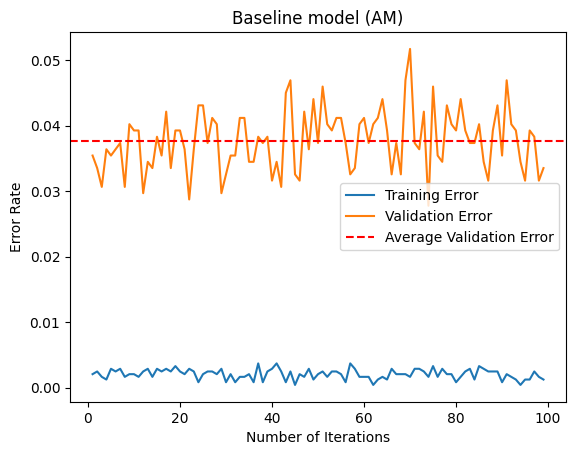

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

df_name = "AM"

df = named_dfs_base[df_name]

# Assuming df is your DataFrame, 'Potability' is the target column, and 'features' is the list of features
target_col = 'target'
features = list(df.columns[df.columns != 'target'])

# Separate features and target variable
X = df[features]
y = df[target_col]

# Split the data into training, validation, and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100,
                               max_features= 'sqrt',
                               min_samples_leaf= 1, min_samples_split= 2, n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_valid_pred = model.predict(X_valid)

# Calculate accuracy on the validation set
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy: {valid_accuracy:.2%}')

# Plot the error curve during training
training_errors = []
validation_errors = []

for i in range(1, 100):
  # Split the data into training, validation, and test sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

    model = RandomForestClassifier(class_weight='balanced', n_estimators=100,
                               max_features= 'sqrt',
                               min_samples_leaf= 1, min_samples_split= 2, n_jobs=-1)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)

    training_errors.append(1 - accuracy_score(y_train, y_train_pred))
    validation_errors.append(1 - accuracy_score(y_valid, y_valid_pred))

# Plot the error curves
average_validation_error_RF = np.average(validation_errors)
print(f'average validation error (100 iterations): {average_validation_error_RF}%')
plt.plot(range(1, 100), training_errors, label='Training Error')
plt.plot(range(1, 100), validation_errors, label='Validation Error')
plt.axhline(y=average_validation_error_RF, color='red', linestyle='--', label='Average Validation Error')

plt.xlabel('Number of Iterations')
plt.ylabel('Error Rate')
plt.title(f"Baseline model ({df_name})")
plt.legend()
plt.show()

Validation Accuracy: 97.09%
average validation error (100 iterations): 0.03577304871803254%


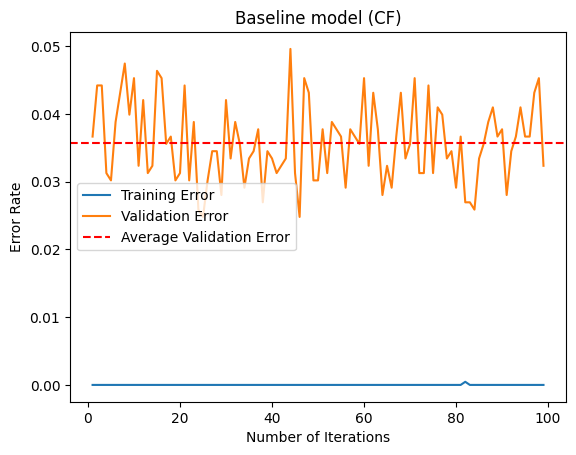

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

df_name = "CF"

df = named_dfs_base[df_name]

# Assuming df is your DataFrame, 'Potability' is the target column, and 'features' is the list of features
target_col = 'target'
features = list(df.columns[df.columns != 'target'])

# Separate features and target variable
X = df[features]
y = df[target_col]

# Split the data into training, validation, and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100,
                               max_features= 'sqrt',
                               min_samples_leaf= 1, min_samples_split= 2, n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_valid_pred = model.predict(X_valid)

# Calculate accuracy on the validation set
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy: {valid_accuracy:.2%}')

# Plot the error curve during training
training_errors = []
validation_errors = []

for i in range(1, 100):
  # Split the data into training, validation, and test sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

    model = RandomForestClassifier(class_weight='balanced', n_estimators=100,
                               max_features= 'sqrt',
                               min_samples_leaf= 1, min_samples_split= 2, n_jobs=-1)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)

    training_errors.append(1 - accuracy_score(y_train, y_train_pred))
    validation_errors.append(1 - accuracy_score(y_valid, y_valid_pred))

# Plot the error curves
average_validation_error_RF = np.average(validation_errors)
print(f'average validation error (100 iterations): {average_validation_error_RF}%')
plt.plot(range(1, 100), training_errors, label='Training Error')
plt.plot(range(1, 100), validation_errors, label='Validation Error')
plt.axhline(y=average_validation_error_RF, color='red', linestyle='--', label='Average Validation Error')

plt.xlabel('Number of Iterations')
plt.ylabel('Error Rate')
plt.title(f"Baseline model ({df_name})")
plt.legend()
plt.show()

## 2.) Revised model - RandomForest
---

Validation Accuracy: 95.61%
average validation error (100 iterations): 0.041313017690970434%


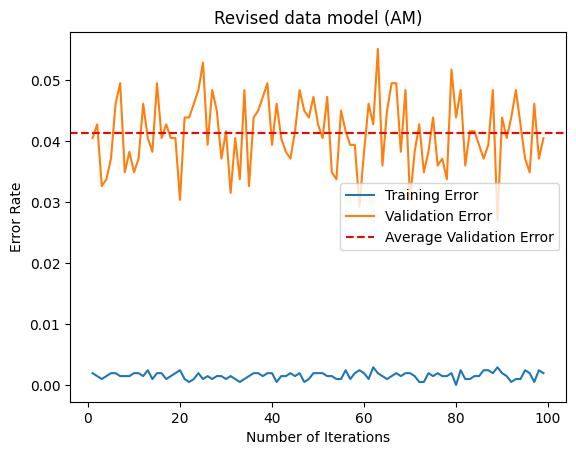

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

df_name = "AM"

df = named_dfs[df_name]

# Assuming df is your DataFrame, 'Potability' is the target column, and 'features' is the list of features
target_col = 'target'
features = list(df.columns[df.columns != 'target'])

# Separate features and target variable
X = df[features]
y = df[target_col]

# Split the data into training, validation, and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100,
                               max_features= 'sqrt',
                               min_samples_leaf= 1, min_samples_split= 2, n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_valid_pred = model.predict(X_valid)

# Calculate accuracy on the validation set
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy: {valid_accuracy:.2%}')

# Plot the error curve during training
training_errors = []
validation_errors = []

for i in range(1, 100):
  # Split the data into training, validation, and test sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

    model = RandomForestClassifier(class_weight='balanced', n_estimators=100,
                               max_features= 'sqrt',
                               min_samples_leaf= 1, min_samples_split= 2, n_jobs=-1)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)

    training_errors.append(1 - accuracy_score(y_train, y_train_pred))
    validation_errors.append(1 - accuracy_score(y_valid, y_valid_pred))

# Plot the error curves
average_validation_error_RF = np.average(validation_errors)
print(f'average validation error (100 iterations): {average_validation_error_RF}%')
plt.plot(range(1, 100), training_errors, label='Training Error')
plt.plot(range(1, 100), validation_errors, label='Validation Error')
plt.axhline(y=average_validation_error_RF, color='red', linestyle='--', label='Average Validation Error')

plt.xlabel('Number of Iterations')
plt.ylabel('Error Rate')
plt.title(f"Revised data model ({df_name})")
plt.legend()
plt.show()

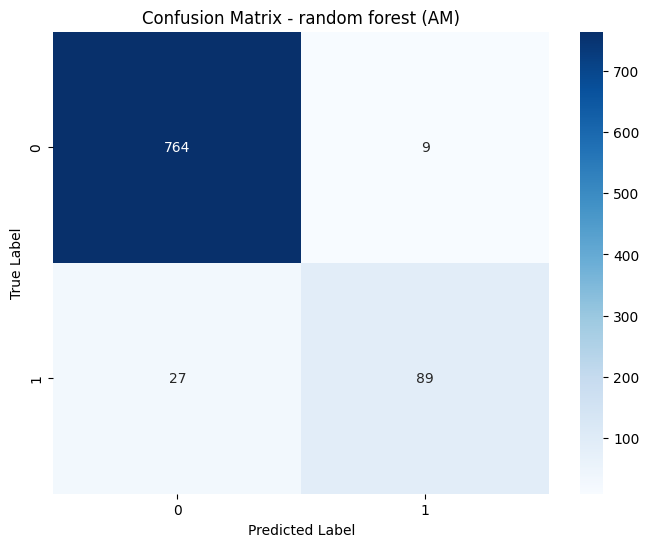

In [ ]:
from sklearn.metrics import confusion_matrix

# class labels for plotting:
class_labels = [0,1]

# compute and display confusion matrix:
cm = confusion_matrix(y_valid, y_valid_pred, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title(f"Confusion Matrix - random forest ({df_name})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
print(classification_report(y_valid, y_valid_pred))


              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       773
         1.0       0.91      0.77      0.83       116

    accuracy                           0.96       889
   macro avg       0.94      0.88      0.90       889
weighted avg       0.96      0.96      0.96       889



Validation Accuracy: 96.02%
average validation error (100 iterations): 0.03584517743809781%


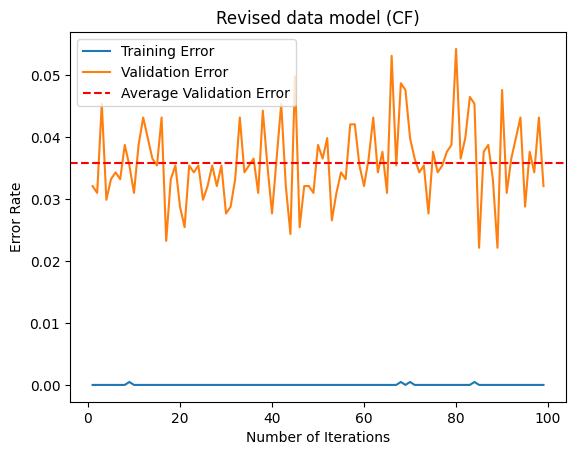

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

df_name = "CF"

df = named_dfs[df_name]

# Assuming df is your DataFrame, 'Potability' is the target column, and 'features' is the list of features
target_col = 'target'
features = list(df.columns[df.columns != 'target'])

# Separate features and target variable
X = df[features]
y = df[target_col]

# Split the data into training, validation, and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100,
                               max_features= 'sqrt',
                               min_samples_leaf= 1, min_samples_split= 2, n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_valid_pred = model.predict(X_valid)

# Calculate accuracy on the validation set
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy: {valid_accuracy:.2%}')

# Plot the error curve during training
training_errors = []
validation_errors = []

for i in range(1, 100):
  # Split the data into training, validation, and test sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

    model = RandomForestClassifier(class_weight='balanced', n_estimators=100,
                               max_features= 'sqrt',
                               min_samples_leaf= 1, min_samples_split= 2, n_jobs=-1)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)

    training_errors.append(1 - accuracy_score(y_train, y_train_pred))
    validation_errors.append(1 - accuracy_score(y_valid, y_valid_pred))

# Plot the error curves
average_validation_error_RF = np.average(validation_errors)
print(f'average validation error (100 iterations): {average_validation_error_RF}%')
plt.plot(range(1, 100), training_errors, label='Training Error')
plt.plot(range(1, 100), validation_errors, label='Validation Error')
plt.axhline(y=average_validation_error_RF, color='red', linestyle='--', label='Average Validation Error')

plt.xlabel('Number of Iterations')
plt.ylabel('Error Rate')
plt.title(f"Revised data model ({df_name})")
plt.legend()
plt.show()

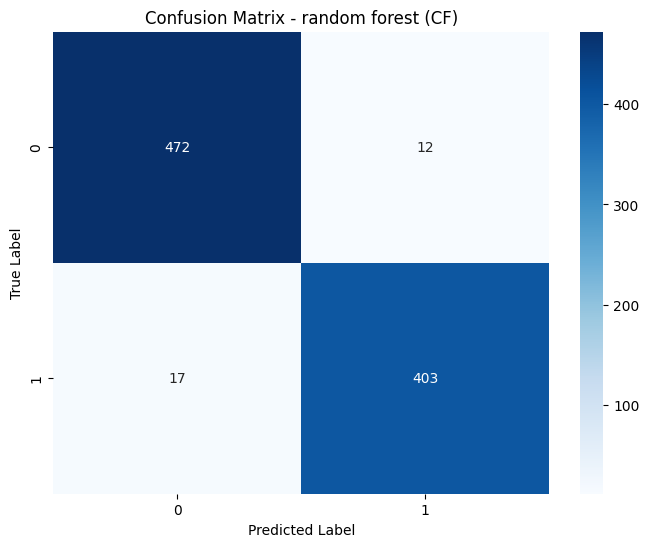

In [ ]:
from sklearn.metrics import confusion_matrix

# class labels for plotting:
class_labels = [0,1]

# compute and display confusion matrix:
cm = confusion_matrix(y_valid, y_valid_pred, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title(f"Confusion Matrix - random forest ({df_name})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
print(classification_report(y_valid, y_valid_pred))


              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       484
         1.0       0.97      0.96      0.97       420

    accuracy                           0.97       904
   macro avg       0.97      0.97      0.97       904
weighted avg       0.97      0.97      0.97       904



Validation Accuracy: 99.67%
average validation error (100 iterations): 0.003509812645212344%


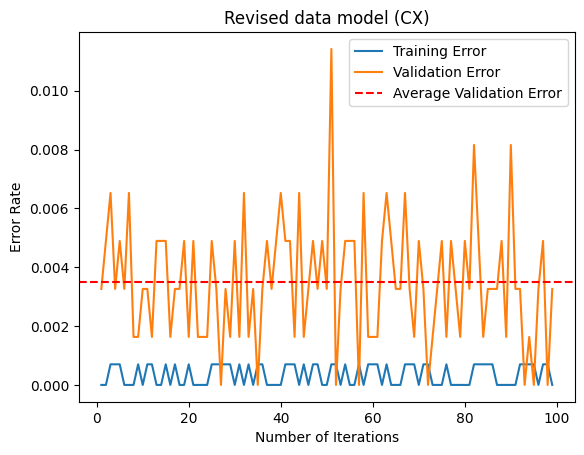

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

df_name = "CX"

df = named_dfs[df_name]

# Assuming df is your DataFrame, 'Potability' is the target column, and 'features' is the list of features
target_col = 'target'
features = list(df.columns[df.columns != 'target'])

# Separate features and target variable
X = df[features]
y = df[target_col]

# Split the data into training, validation, and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100,
                               max_features= 'sqrt',
                               min_samples_leaf= 1, min_samples_split= 2, n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_valid_pred = model.predict(X_valid)

# Calculate accuracy on the validation set
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy: {valid_accuracy:.2%}')

# Plot the error curve during training
training_errors = []
validation_errors = []

for i in range(1, 100):
  # Split the data into training, validation, and test sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

    model = RandomForestClassifier(class_weight='balanced', n_estimators=100,
                               max_features= 'sqrt',
                               min_samples_leaf= 1, min_samples_split= 2, n_jobs=-1)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)

    training_errors.append(1 - accuracy_score(y_train, y_train_pred))
    validation_errors.append(1 - accuracy_score(y_valid, y_valid_pred))

# Plot the error curves
average_validation_error_RF = np.average(validation_errors)
print(f'average validation error (100 iterations): {average_validation_error_RF}%')
plt.plot(range(1, 100), training_errors, label='Training Error')
plt.plot(range(1, 100), validation_errors, label='Validation Error')
plt.axhline(y=average_validation_error_RF, color='red', linestyle='--', label='Average Validation Error')

plt.xlabel('Number of Iterations')
plt.ylabel('Error Rate')
plt.title(f"Revised data model ({df_name})")
plt.legend()
plt.show()

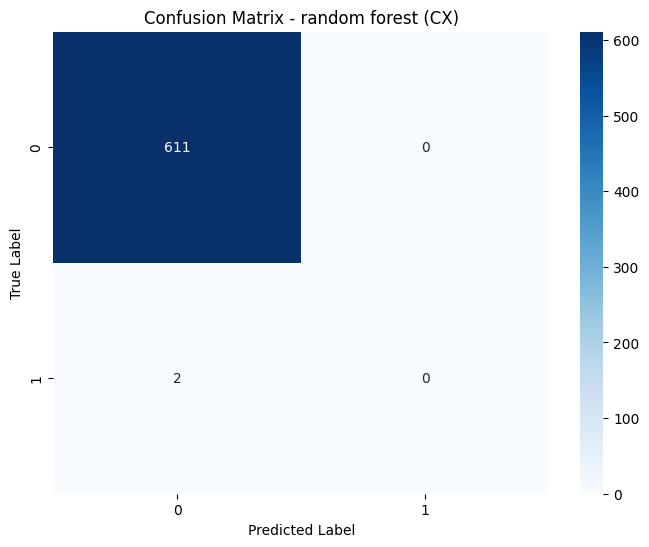

In [ ]:
from sklearn.metrics import confusion_matrix

# class labels for plotting:
class_labels = [0,1]

# compute and display confusion matrix:
cm = confusion_matrix(y_valid, y_valid_pred, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title(f"Confusion Matrix - random forest ({df_name})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## 3.) Revised model - auto-sklearn

In [ ]:
df_name = "AM"

df = named_dfs[df_name]

# Assuming df is your DataFrame, 'Potability' is the target column, and 'features' is the list of features
target_col = 'target'
features = list(df.columns[df.columns != 'target'])

# Separate features and target variable
X = df[features]
y = df[target_col]

# Split the data into training, validation, and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from autosklearn.experimental.askl2 import AutoSklearn2Classifier
cls = AutoSklearn2Classifier(memory_limit=12000, time_left_for_this_task=600)
cls.fit(X_train, y_train)
y_valid_pred = cls.predict(X_valid)

# Calculate accuracy on the validation set
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy: {valid_accuracy:.2%}')

/usr/local/lib/python3.10/dist-packages/autosklearn/experimental/selector.py:26: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, series in prediction.iteritems():
Fitting to the training data:   0%|          | 1/600 [00:01<10:00,  1.00s/it, The total time budget for this task is 0:10:00]/usr/local/lib/python3.10/dist-packages/smac/intensification/parallel_scheduling.py:153: UserWarning: SuccessiveHalving is executed with 1 workers only. Consider to use pynisher to use all available workers.
  warnings.warn(
Fitting to the training data: 100%|██████████| 600/600 [09:51<00:00,  1.01it/s, The total time budget for this task is 0:10:00]


Validation Accuracy: 96.96%


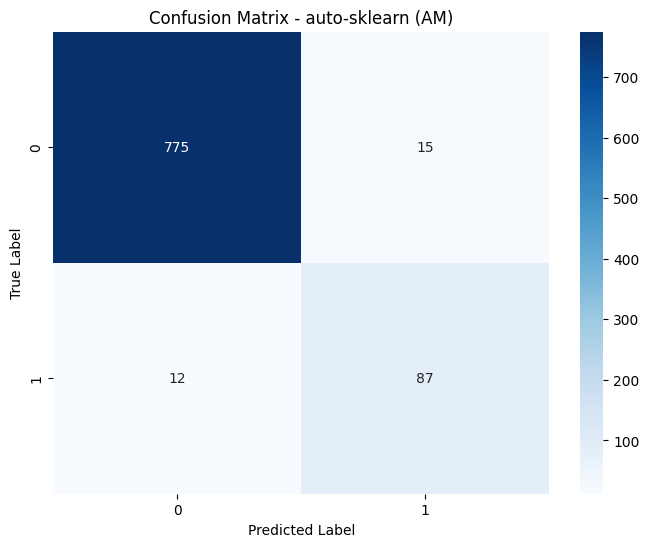

In [ ]:
from sklearn.metrics import confusion_matrix

# class labels for plotting:
class_labels = [0,1]

# compute and display confusion matrix:
cm = confusion_matrix(y_valid, y_valid_pred, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title(f"Confusion Matrix - auto-sklearn ({df_name})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
print(classification_report(y_valid, y_valid_pred))


              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       790
         1.0       0.85      0.88      0.87        99

    accuracy                           0.97       889
   macro avg       0.92      0.93      0.92       889
weighted avg       0.97      0.97      0.97       889



In [ ]:
df_name = "CF"

df = named_dfs[df_name]

# Assuming df is your DataFrame, 'Potability' is the target column, and 'features' is the list of features
target_col = 'target'
features = list(df.columns[df.columns != 'target'])

# Separate features and target variable
X = df[features]
y = df[target_col]

# Split the data into training, validation, and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from autosklearn.experimental.askl2 import AutoSklearn2Classifier
cls = AutoSklearn2Classifier(memory_limit=12000, time_left_for_this_task=600)
cls.fit(X_train, y_train)
y_valid_pred = cls.predict(X_valid)

# Calculate accuracy on the validation set
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy: {valid_accuracy:.2%}')

/usr/local/lib/python3.10/dist-packages/autosklearn/experimental/selector.py:26: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, series in prediction.iteritems():
/usr/local/lib/python3.10/dist-packages/autosklearn/experimental/selector.py:26: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, series in prediction.iteritems():
Fitting to the training data:   0%|          | 3/600 [00:03<10:00,  1.01s/it, The total time budget for this task is 0:10:00]/usr/local/lib/python3.10/dist-packages/smac/intensification/parallel_scheduling.py:153: UserWarning: SuccessiveHalving is executed with 1 workers only. Consider to use pynisher to use all available workers.
  warnings.warn(
Fitting to the training data: 100%|██████████| 600/600 [09:50<00:00,  1.02it/s, The total time budget for this task is 0:10:00]


Validation Accuracy: 97.01%


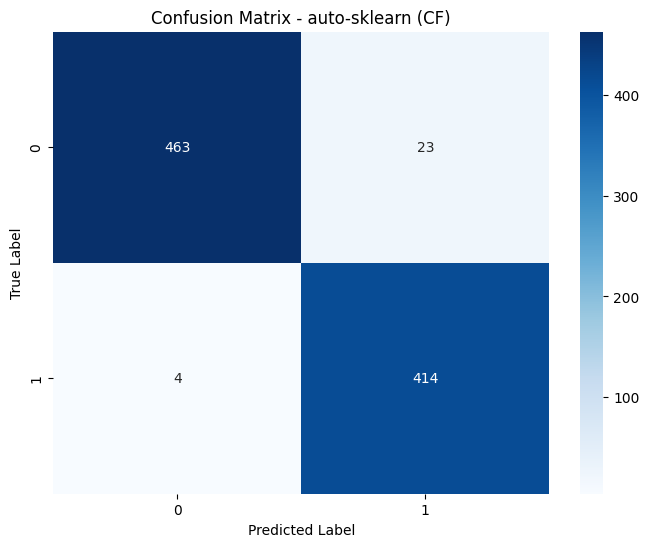

In [ ]:
from sklearn.metrics import confusion_matrix

# class labels for plotting:
class_labels = [0,1]

# compute and display confusion matrix:
cm = confusion_matrix(y_valid, y_valid_pred, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title(f"Confusion Matrix - auto-sklearn ({df_name})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
print(classification_report(y_valid, y_valid_pred))


              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       486
         1.0       0.95      0.99      0.97       418

    accuracy                           0.97       904
   macro avg       0.97      0.97      0.97       904
weighted avg       0.97      0.97      0.97       904

